# Advertising Data Set 

This data set has sales data which was achived with the help of different media sources like 'TV', Radio and Newspaper. we'll build a model to predict `Sales` using an appropriate predictor variable.

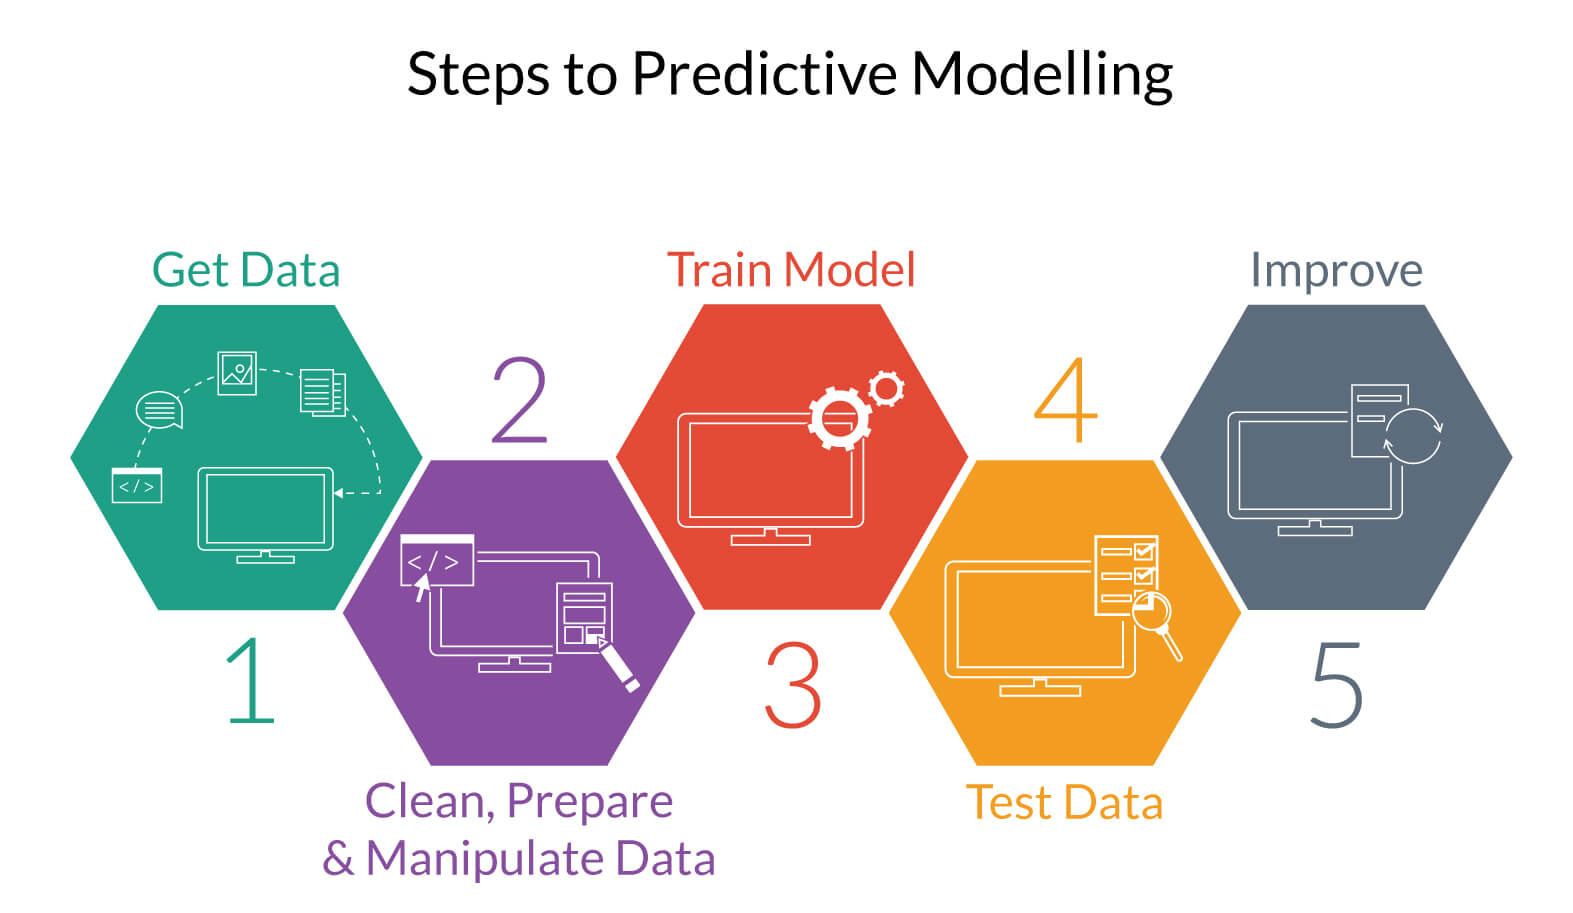

In [1]:
#display a expernal image
from IPython.display import Image
Image("ML_Process.jpg", height=500, width=900)

# Reading & Understanding Data 
    1. Lets import the data
    2. Understand Data

In [2]:
# we can import all packages in a single line sode as well as wrrite separte statments for each of them
import pandas as pd, numpy as np , matplotlib.pyplot as plt, seaborn as sns

#importing the dataset which is in our root Directory, just in case 
adv = pd.read_csv("Advertising.csv")


In [3]:
# lest check the data type of our dataframe 
?type

In [4]:
type(adv)

pandas.core.frame.DataFrame

In [5]:
# lets take a first look of our data
adv.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
# lets get the concise summary of our data frame
adv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Conclusion: We understand that there are 200 rows/entires 4 colums the data types of these all columns is Float

In [35]:
#lets get a statistical view of our variables 
adv.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


### Visualising the Data

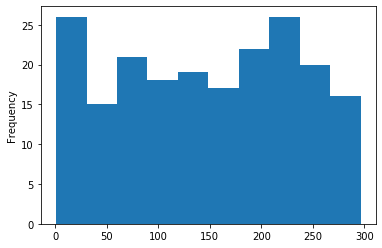

In [36]:
adv.TV.plot.hist()

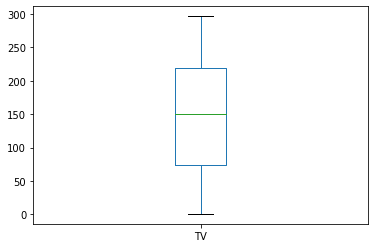

In [37]:
#lets check if we have any outliers 
adv.TV.plot.box()
plt.show()

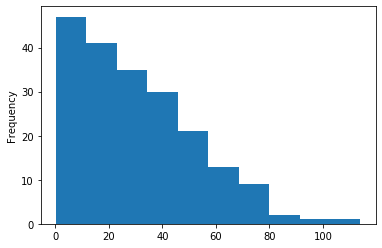

In [38]:
adv.Newspaper.plot.hist()

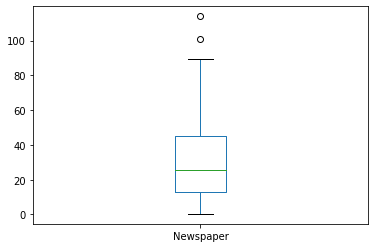

In [39]:
adv.Newspaper.plot.box()
plt.show()

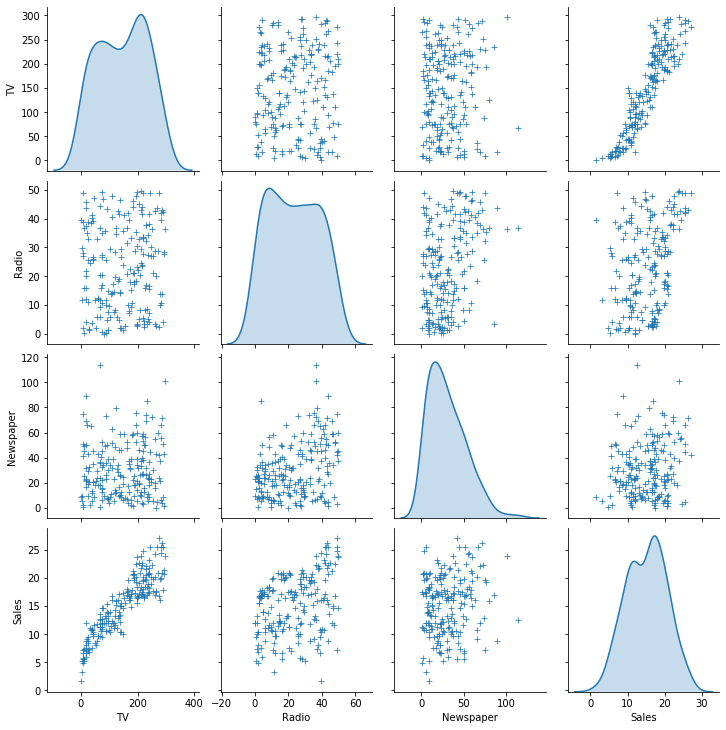

In [40]:
# lets find the relations between the various sources 
sns.pairplot(adv,markers = "+", diag_kind="kde")
plt.show()

C:\Users\Shree Ram\anaconda3\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


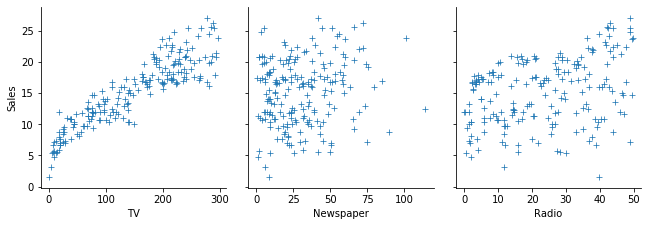

In [41]:
sns.pairplot(adv, x_vars = ['TV', 'Newspaper','Radio'], y_vars='Sales', markers = "+", size = 3)
plt.show()

We observe here that the sales through advertising on TV is more than any other resources

### Corelations between variables 

In [42]:
corel = adv.corr()
corel

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


As its visible from the Heat Map and Pair plot that `TV` seems to be the most correlated with `Sales`, so lets
perfom Simple Linear Regressio using `TV` as feature variable.

## Step to Performa Simple Linear Regression 

Equaiton of Simple Linear Regression is<br>

$y = c + m_1 \times TV$

the $m$ value is called as the model **coeffecitients** or **model parameters**.

--- 

### Step towards building a model 
we first assign `TV` our feature variable, in this case to `x` and the reposnse variable `Sales` , to the variable `y`

In [43]:
X = adv[['TV']] #use of [[ ]] brackets is to access the variable
y = adv['Sales']

In [44]:
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [45]:
y.head()

0    22.1
1    10.4
2    12.0
3    16.5
4    17.9
Name: Sales, dtype: float64

Train - Test Split 
You now need to split our variables inti train and test data , we will perfom train test split by using `train_test_split` from the `sklearn.model_selection` , it is considred to be good practise to divide you 100% data into 70% as training data set and 30% as testing data set

In [46]:
from sklearn.model_selection import train_test_split 

In [47]:
?train_test_split

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, random_state = 100)

In [49]:
X_train.shape, X_test.shape

((140, 1), (60, 1))

### Regression Model using Scikit Learn

In [50]:
from sklearn.linear_model import LinearRegression 

In [51]:
?LinearRegression

In [52]:
#instansiate the Linear Regression Model
linear_reg_model = LinearRegression()

In [53]:
?linear_reg_model.fit

In [61]:
linear_reg_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
?linear_reg_model.intercept_

In [63]:
linear_reg_model.intercept_

6.948683200001357

In [64]:
?linear_reg_model.coef_

In [65]:
linear_reg_model.coef_

array([0.05454575])

From the above parameters we obtaines our linear regression equation becomes.

$ Sales = 6.948 + 0.054 \times TV $

In [66]:
from sklearn.metrics import r2_score 

In [68]:
y_train_predict = linear_reg_model.predict(X_train)

In [69]:
y_train_predict[:4]

array([18.58874687, 15.21236477, 18.13056255, 14.74327129])

In [70]:
r2_score(y_train,y_train_predict)

0.8157933136480389

#### Predection on the test set

In [73]:
y_test_predict = linear_reg_model.predict(X_test)

In [74]:
r2_score(y_test, y_test_predict)

0.7921031601245662